In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv('data.csv')

In [9]:
X,y = df.iloc[:10000, :-1], df.iloc[:10000, -1]

# Making Train and Test data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting an SVM Model

In [141]:
from sklearn.svm import SVC

In [142]:
clf1=SVC(kernel ='linear', C=1, gamma=1)
clf1.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
y_pred= clf1.predict(x_test)

In [144]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9085


# Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[186   0   0   0   0   4   0   0   1   0   0]
 [  0 158   0   0   0   0   0   0   0  21   0]
 [  0   0 181   0   8   0   0   0   0   0   0]
 [  0   0  15 172   1   0   0   0   0   0   0]
 [  0   0   3   6 143   0   0  25   0   0   0]
 [  5   0   0   0   0 158   0   0  28   0   0]
 [  0   0   0   0   0   0 180   0   0   0   0]
 [  0   0   2   1   8   0   0 163   0   0   0]
 [  3   0   0   0   0  26   0   0 148   0   0]
 [  0  26   0   0   0   0   0   0   0 146   0]
 [  0   0   0   0   0   0   0   0   0   0 182]]


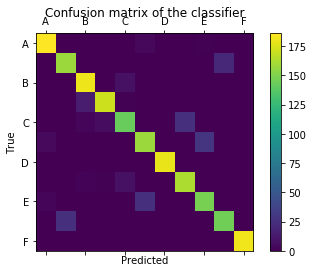

In [137]:
labels = ["A","B","C","D","E","F"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Grid Search for SVM

In [122]:
from sklearn.model_selection import GridSearchCV

In [130]:
parameters = {'kernel':['linear'], 'C':[0.00001, 0.0001,0.001,0.01,0.1, 0.5, 0.8]}
# parameters = {'kernel':['linear'], 'C':[0.1,10,20,40,70,100,200,260,512]}

In [131]:
clfGridSV = GridSearchCV(clf1,parameters,cv=3)

In [132]:
clfGridSV.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1,
                           kernel='linear', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.8],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
sorted(clfGridSV.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [134]:
accuracy_SVM=clfGridSV.cv_results_['mean_test_score']

In [135]:
accuracy_SVM

array([0.093   , 0.093   , 0.093   , 0.38675 , 0.74075 , 0.880375,
       0.888   ])

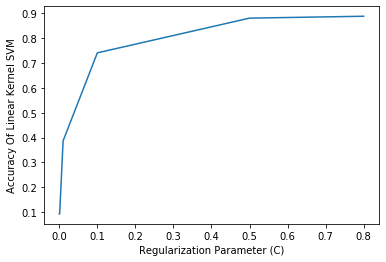

In [136]:
plt.ylabel('Accuracy Of Linear Kernel SVM')
plt.xlabel('Regularization Parameter (C)')
plt.plot([0.00001, 0.0001,0.001,0.01,0.1, 0.5, 0.8],accuracy_SVM)

# Fitting the KNN Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)


In [25]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(accuracy_score(y_test, y_pred_knn))

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)

print(cm_knn)


0.944
[[169   0   0   0   0  22   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0  19   0]
 [  1   0 186   1   1   0   0   0   0   0   0]
 [  0   0   4 181   3   0   0   0   0   0   0]
 [  0   0   4   3 164   1   0   5   0   0   0]
 [  8   0   0   0   0 178   0   2   3   0   0]
 [  0   0   0   0   0   0 180   0   0   0   0]
 [  0   0   0   3   4   1   0 166   0   0   0]
 [  0   2   1   0   0  10   0   0 164   0   0]
 [  0  14   0   0   0   0   0   0   0 158   0]
 [  0   0   0   0   0   0   0   0   0   0 182]]


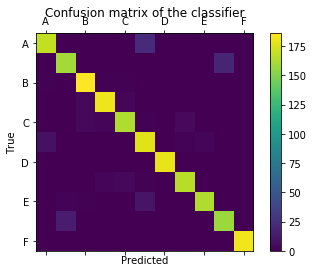

In [26]:
labels = ["A","B","C","D","E","F","G","H","I","J","K"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_knn)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'n_neighbors': [1,3,5,10,15,30]}
# parameters = {'kernel':['linear'], 'C':[0.1,10,20,40,70,100,200,260,512]}

In [104]:
gs_knn = GridSearchCV(model,parameters,cv=5)

In [105]:
gs_knn.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
accuracy_gs_knn=gs_knn.cv_results_['mean_test_score']

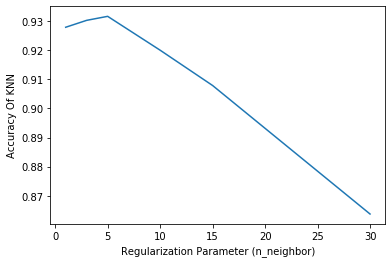

In [109]:
plt.ylabel('Accuracy Of KNN')
plt.xlabel('Regularization Parameter (n_neighbor)')
plt.plot([1,3,5,10,15,30],accuracy_gs_knn)

# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
# clf = RandomForestClassifier(max_depth=5, random_state=0)
dt = DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [95]:
y_pred_tree = dt.predict(x_test)

In [96]:
print(accuracy_score(y_test, y_pred_tree))

0.9375


In [111]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, y_pred_tree)

print(cm_tree)

[[180   0   0   0   0   6   0   4   1   0   0]
 [  0 171   0   0   0   2   0   0   0   6   0]
 [  0   0 180   1   8   0   0   0   0   0   0]
 [  0   0   6 177   1   0   4   0   0   0   0]
 [  0   0   3   3 151   0   0  20   0   0   0]
 [ 11   0   0   0   2 168   0   0  10   0   0]
 [  0   0   0   1   0   0 179   0   0   0   0]
 [  0   0   0   6  12   0   0 156   0   0   0]
 [  0   0   0   0   0   9   0   0 168   0   0]
 [  0   9   0   0   0   0   0   0   0 163   0]
 [  0   0   0   0   0   0   0   0   0   0 182]]


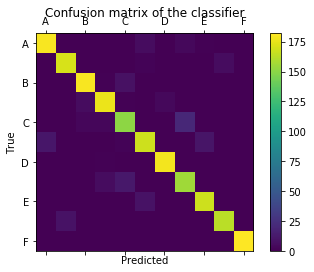

In [112]:
labels = ["A","B","C","D","E","F","G","H","I","J","K"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_tree)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameters = {'max_depth': [3,6,9,12]}
# parameters = {'kernel':['linear'], 'C':[0.1,10,20,40,70,100,200,260,512]}

In [115]:
gs_tree = GridSearchCV(estimator,parameters,cv=3)

In [116]:
gs_tree.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=25,
                                              max_features=None,
                                              max_leaf_nodes=25,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [3, 6, 9, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [117]:
accuracy_gs_tree=gs_tree.cv_results_['mean_test_score']

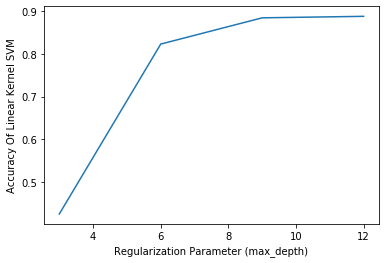

In [118]:
plt.ylabel('Accuracy Of Linear Kernel SVM')
plt.xlabel('Regularization Parameter (max_depth)')
plt.plot([3,6,9,12],accuracy_gs_tree)

# Logistic Regression Classifier

In [29]:
from sklearn.linear_model import LogisticRegression

In [48]:
logclf = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga', class_weight='balanced', multi_class='multinomial').fit(x_train, y_train)

C:\Users\anujn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
y_pred_log = logclf.predict(x_test)

In [50]:
print(accuracy_score(y_test, y_pred_log))

0.903


# Ensemble model

In [88]:
from sklearn.ensemble import VotingClassifier

In [89]:
eclf1 = VotingClassifier(estimators=[('lr', logclf), ('dt', dt), ('knn', knn_model), ('svc', clf1)], voting='hard')
eclf1 = eclf1.fit(X, y)

C:\Users\anujn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [90]:
y_ens = logclf.predict(x_test)
print(accuracy_score(y_test, y_ens))

0.903


# Accuracy

In [ ]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    diff = y_true - y_pred
    t = np.where(diff == 0)
    return t[0].shape[0]/y_true.shape[0]
#     return accuracy_score(y_true=y_true, y_pred=y_pred)

# PCA

In [ ]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    Covariance = np.dot(X_train.T, X_train) / (N-1)
    __ , vector = np.linalg.eig(Covariance)
    return np.dot(X_train, vector)

# Confusion Matrix

In [ ]:
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """  
    cf_matrix = np.zeros((11,11))
    
    for x in range(y_true):
        cf_matrix[y_true][y_pred] = cf_matrix[y_true][y_pred] + 1
    
    return cf_matrix